In [1]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

In [2]:
from tensorflow.keras.models import Sequential

In [3]:
from tensorflow.keras.layers import Convolution2D

In [4]:
from tensorflow.keras.layers import MaxPooling2D

In [5]:
from tensorflow.keras.layers import Flatten

In [6]:
from tensorflow.keras.layers import Dense

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
Classifier=Sequential()

In [9]:
Classifier.add(Convolution2D(32,3,3,input_shape=(225,225,3),activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Convolution2D(128,3,3,activation='relu'))
Classifier.add(MaxPooling2D(pool_size=(2,2)))
Classifier.add(Flatten())
Classifier.add(Dense(256, activation='relu'))
Classifier.add(Dense(2, activation='softmax'))

Classifier.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
Classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 75, 75, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 128)       36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1179904   
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 5

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [12]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [14]:
training_set=train_datagen.flow_from_directory('data/Train',target_size=(225,225),batch_size=32,class_mode='categorical')

Found 167 images belonging to 2 classes.


In [15]:
test_set=test_datagen.flow_from_directory('data/Test',target_size=(225,225),batch_size=32,class_mode='categorical')

Found 65 images belonging to 2 classes.


In [16]:
epochs = 30
batch_size = 32

In [17]:
Classifier.fit_generator( training_set, steps_per_epoch=training_set.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_set,validation_steps=test_set.samples // batch_size)

Epoch 1/30
5/5 [==============================] - 5s 826ms/step - loss: 0.8441 - accuracy: 0.5778 - val_loss: 0.4338 - val_accuracy: 0.7812
Epoch 2/30
5/5 [==============================] - 4s 795ms/step - loss: 0.5532 - accuracy: 0.7481 - val_loss: 0.2698 - val_accuracy: 0.8906
Epoch 3/30
5/5 [==============================] - 4s 733ms/step - loss: 0.4506 - accuracy: 0.7704 - val_loss: 0.2944 - val_accuracy: 0.8594
Epoch 4/30
5/5 [==============================] - 3s 586ms/step - loss: 0.2771 - accuracy: 0.8889 - val_loss: 0.1438 - val_accuracy: 0.9688
Epoch 5/30
5/5 [==============================] - 3s 686ms/step - loss: 0.1119 - accuracy: 0.9778 - val_loss: 0.5913 - val_accuracy: 0.6875
Epoch 6/30
5/5 [==============================] - 3s 584ms/step - loss: 0.2683 - accuracy: 0.9037 - val_loss: 0.0864 - val_accuracy: 0.9844
Epoch 7/30
5/5 [==============================] - 3s 649ms/step - loss: 0.0755 - accuracy: 0.9852 - val_loss: 0.1390 - val_accuracy: 0.9219
Epoch 8/30
5/5 [====

In [18]:
import h5py

In [19]:
Classifier.save('number1.h5')

In [1]:
from keras.models import load_model

In [2]:
model=load_model('number1.h5')

In [42]:
import cv2
import sys
from PIL import Image

cascPath = sys.argv[1]
#faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

video_capture = cv2.VideoCapture(0)
condition = True

while condition:
    # Capture frame-by-frame
    ret, frame = video_capture.read()
        
    # Display the resulting frame
    cv2.imshow('Video', frame)
    
    k = cv2.waitKey(100)
    if k == 27:         # wait for ESC key to exit
        cv2.destroyAllWindows()
    elif k == ord('s'): # wait for 's' key to save and exit
        cv2.imwrite('result/img1.jpg',frame)
        cv2.destroyAllWindows()
        condition = False
    
video_capture.release()
cv2.destroyAllWindows()

In [43]:
import numpy as np

In [44]:
from tensorflow.keras.preprocessing import image
test_image=image.load_img('result/img1.jpg',target_size=(225,225))

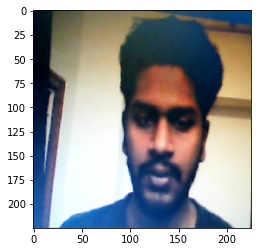

In [45]:
import matplotlib.pyplot as plt
img = plt.imshow(test_image)

In [46]:
test_image=image.img_to_array(test_image)

In [47]:
test_image=np.expand_dims(test_image,axis=0)

In [48]:
result=model.predict(test_image)

In [49]:
result

array([[1., 0.]], dtype=float32)

In [50]:
prediction = result[0]

In [51]:
classes=training_set.class_indices

In [52]:
classes

{'person_a': 0, 'person_b': 1}

In [53]:
prediction=list(prediction)

In [54]:
prediction

[1.0, 0.0]

In [55]:
classes=['person_a','person_b']

In [56]:
output=zip(classes,prediction)

In [57]:
output=dict(output)

In [58]:
output

{'person_a': 1.0, 'person_b': 0.0}

In [59]:
if output['person_a']==1.0 :
    print('person_a')
elif output['person_b']==1.0:
    print('person_b')

person_a
